# Table of Content
 **[Project 1: California Problem](#Project-1:-Boston-House-price-dataset-Problem)**
 <p>The focus of the session is to take a <b>California House price</b> dataset case study by building a Linear supervised Machine Learning pipeline on a <b>Boston House price</b> dataset samples (Dataset).</p>
 
  <p>
</p>
 <p>Our Goal is to develop a model that cab predict the Boston house prices. Therefore, the dataset is imported from the default datasets which consists of Dictionary Keys such as features (X) and target (y) variables.</p>
 
* ***[Part 1: Load Basic Libraries](#Part-1:-Load-Basic-Libraries)***
* ***[Part 2: Data Retrieval](#Part-2:-Data-Retrieval)***
* ***[Part 3: Data Preparation](#Part-3:-Data-Preparation)***
* ***[Part 4: Exploratory Data Analysis](#Part-4:-Exploratory-Data-Analysis)***
* ***[Part 5: Modelling](#Part-5:-Modelling)***
* ***[Part 6: Model Deployment](#Part-6:-Model-Deployment)***
* ***[Part 7: Model to Predict New Data](#Part-7:-Model-to-Predict-New-Data)***

### Part 1: Load Basic Libraries

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Part 2: Data Retrieval

In [84]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [85]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [5]:
print(housing.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [6]:
print(housing.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [7]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


### Part 3: Data Preparation

In [8]:
X = pd.DataFrame(housing.data, columns=housing.feature_names)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
X['Price'] = housing.target
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


From the information above, the dataset consists of 9 attributes: MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude, and the Price.


In [11]:
X.describe(). T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
Price,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


The observation to confirm the data quality, count is 20640 instances and it is same for all the attributes. which means there not missing rows. Can't help to notice that the maximum price tag of a house is 5.000010, which means the average maximum price is 500010 in value. 

In [12]:
X.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

### Part 4: Exploratory Data Analysis

In [13]:
X.corr()   # Correlation Analysis of the dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


### Brief Statistics on the Target Variable 

In [14]:
# Minimum prices of the attribute
minimum_price = np.amin(X['Price'])

# Maximum prices of the attribute
maximum_price = np.amax(X['Price'])

# Mean prices of the attribute
mean_price = np.mean(X['Price'])

# Median prices of the attribute
median_price = np.median(X['Price'])

# Standard deviation of prices of the attribute
std_price = np.std(X['Price'])


# Show the calculated  Statistics
print("Statistics for California Housing Dataset:\n")
print("Minimum price: ${}".format(minimum_price*100000))
print("Maximum price: ${}".format(maximum_price*100000))
print("Mean price: ${}".format(mean_price*100000))
print("Median price: ${}".format(median_price*100000))
print("Standard Deviation of prices: ${}".format(std_price*100000))

Statistics for California Housing Dataset:

Minimum price: $14999.000000000002
Maximum price: $500000.99999999994
Mean price: $206855.81690891844
Median price: $179700.0
Standard Deviation of prices: $115392.82040412349


### Analysis on the Target (y) variable
<p> from the View of the data distribution, can see the Prices of California houses are distributed normally with some few outlier </p>


c:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


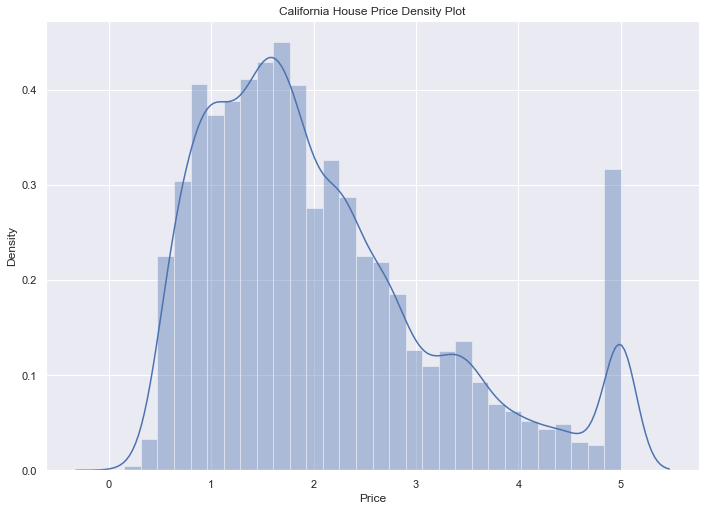

In [18]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(X['Price'], bins=30)
plt.title('California House Price Density Plot')
plt.show();

<function matplotlib.pyplot.legend(*args, **kwargs)>

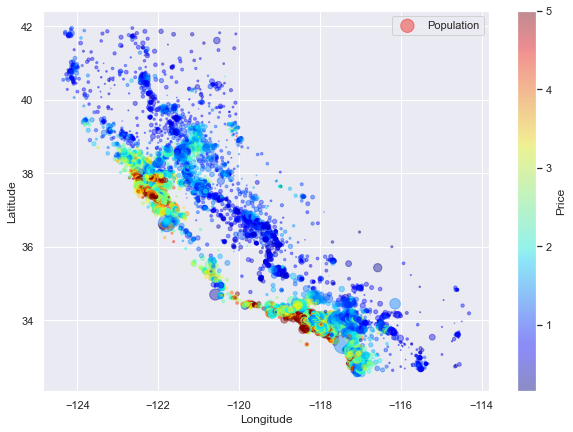

In [93]:
X.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4,
s=X["Population"]/100, label="Population", figsize=(10,7),
c="Price", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False);
plt.legend

### HeatMap to determine the Correlation Matrix

<AxesSubplot:>

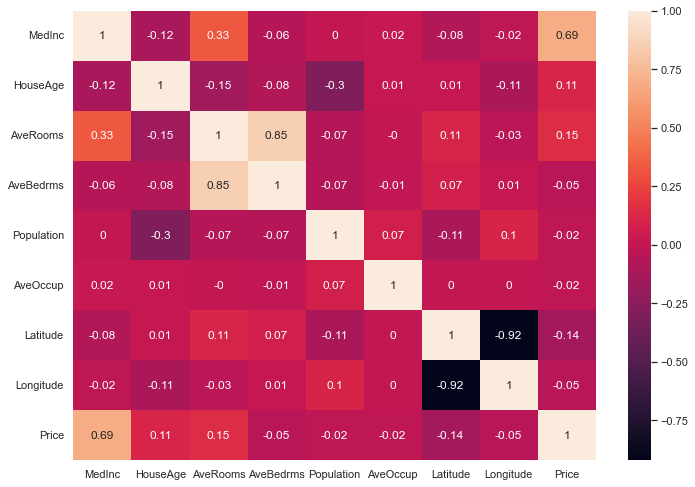

In [20]:
cor_mat = X.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=cor_mat, annot=True)

In [ ]:
calif_cor = X.corr()
calif_cor["Price"].sort_value(ascending = False)

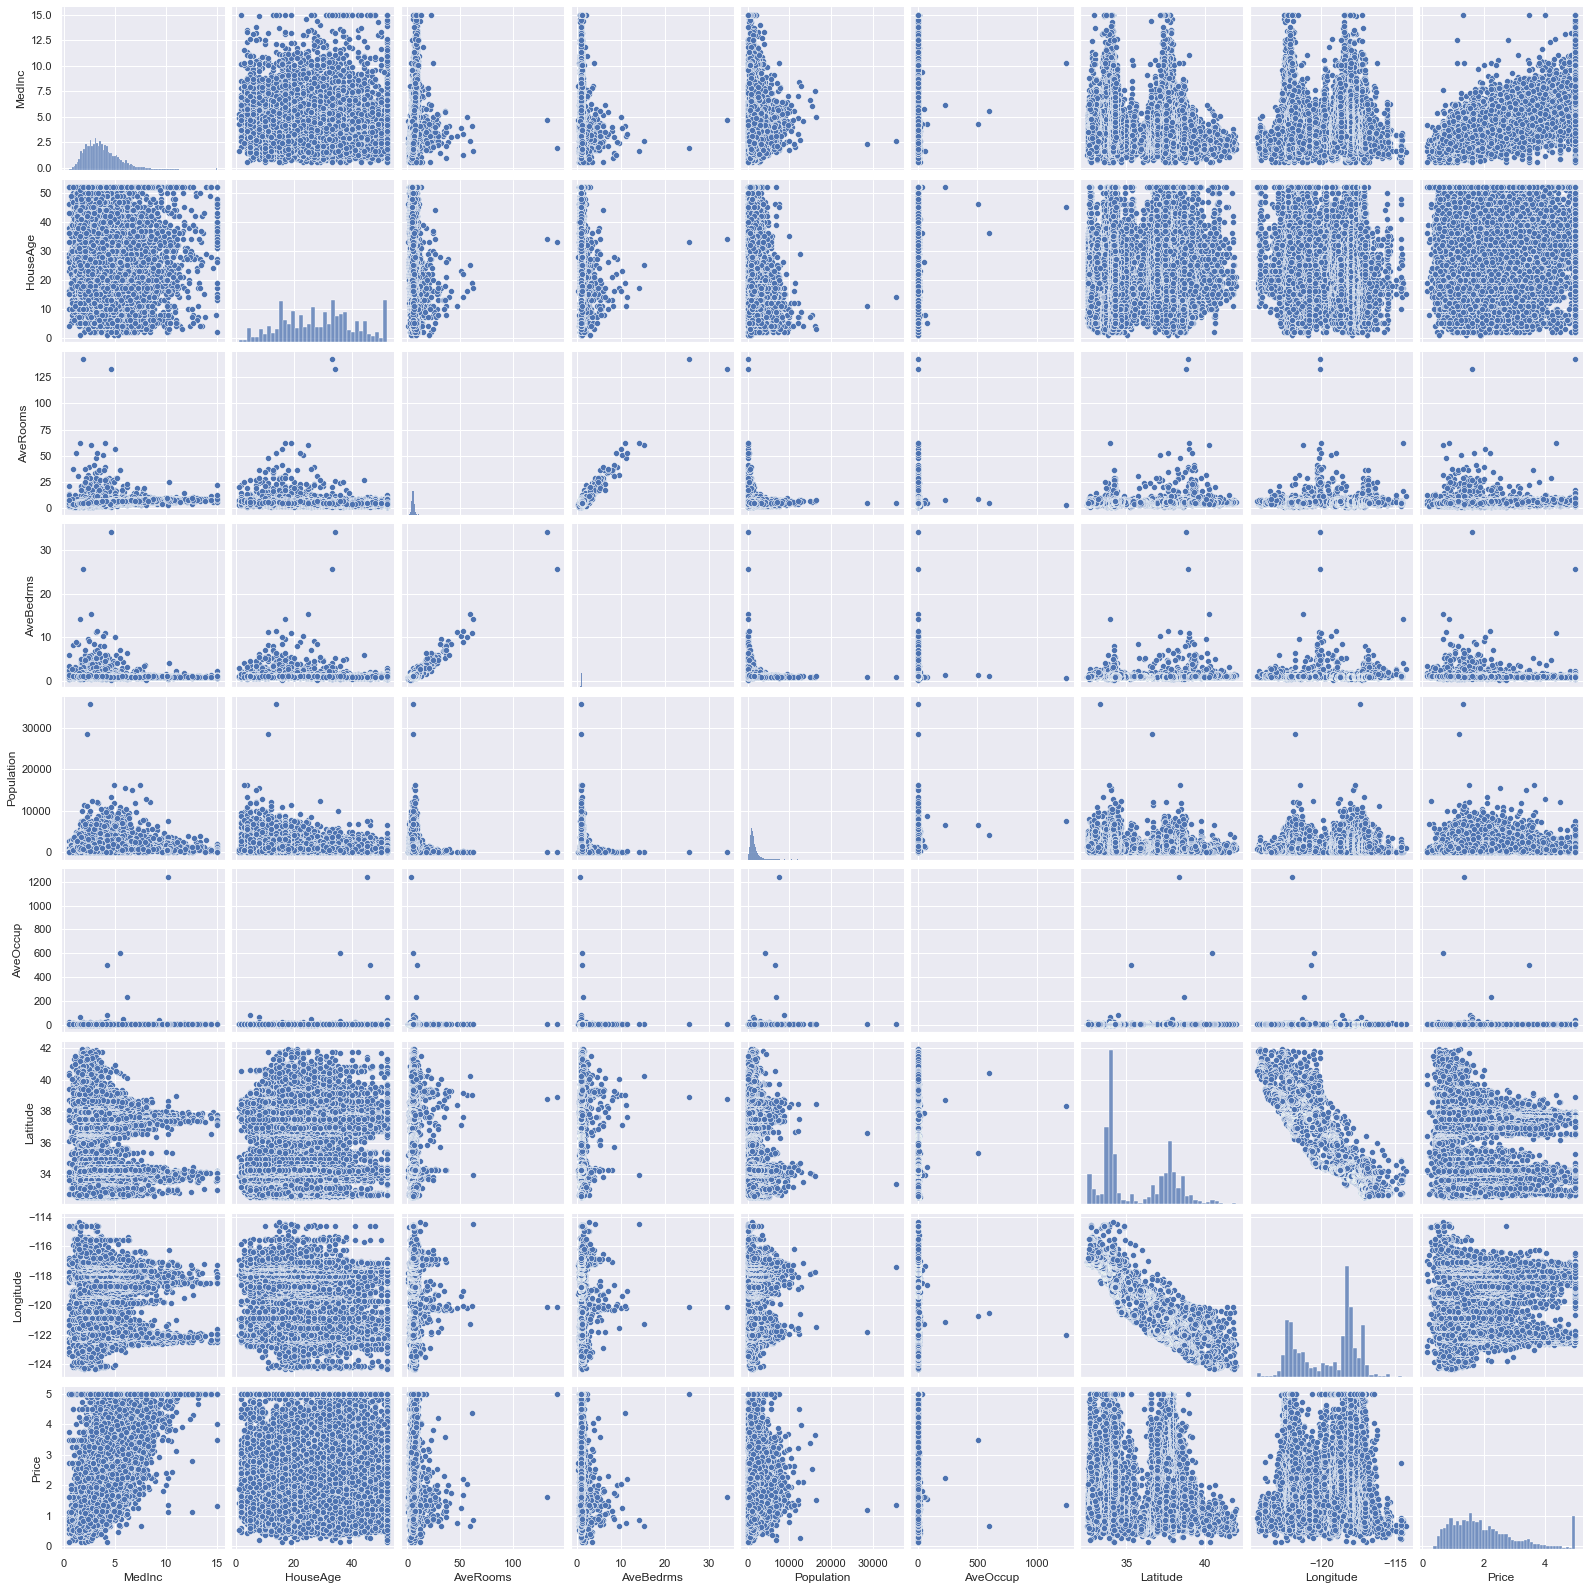

In [21]:
sns.pairplot(X)

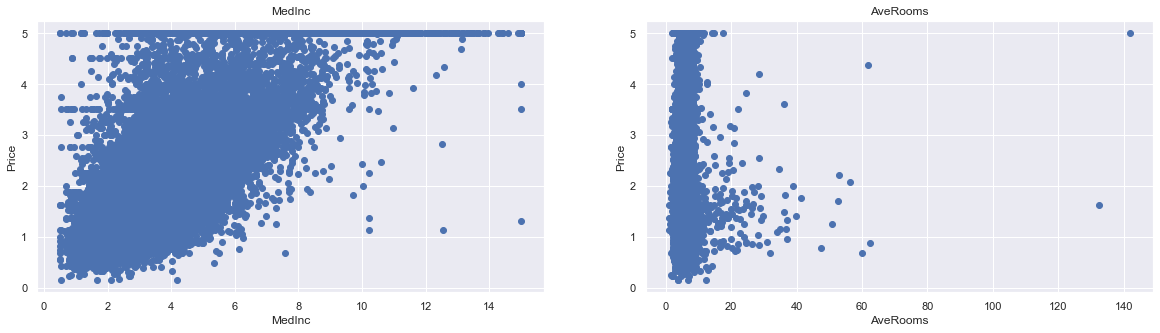

In [22]:
plt.figure(figsize=(20, 5))

features = ['MedInc', 'AveRooms']
target = X['Price']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = X[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Price')

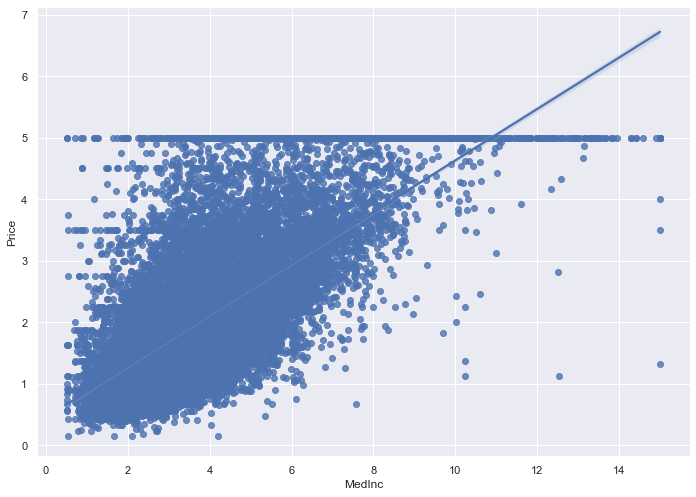

In [23]:
sns.regplot(x="MedInc", y="Price", data=X);

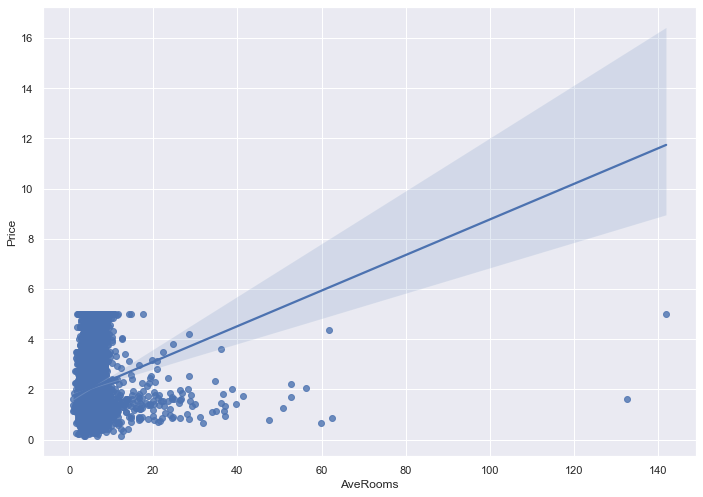

In [24]:
sns.regplot(x="AveRooms", y="Price", data=X);

### Processing the Independent and Dependent Variables

In [25]:
X1 = X.iloc[:,:-1]
y = X.iloc[:,-1]

In [26]:
 X1.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [27]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Price, Length: 20640, dtype: float64

### Train Test Split

Prepare the data so that model can process.

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.3, random_state = 42)

In [31]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
7061,4.1312,35.0,5.882353,0.975490,1218.0,2.985294,33.93,-118.02
14689,2.8631,20.0,4.401210,1.076613,999.0,2.014113,32.79,-117.09
17323,4.2026,24.0,5.617544,0.989474,731.0,2.564912,34.59,-120.14
10056,3.1094,14.0,5.869565,1.094203,302.0,2.188406,39.26,-121.00
15750,3.3068,52.0,4.801205,1.066265,1526.0,2.298193,37.77,-122.45
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [36]:
X_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20046,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.06,-119.01
3024,2.5313,30.0,5.039384,1.193493,1565.0,2.679795,35.14,-119.46
15663,3.4801,52.0,3.977155,1.185877,1310.0,1.360332,37.80,-122.44
20484,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,34.28,-118.72
9814,3.7250,34.0,5.492991,1.028037,1063.0,2.483645,36.62,-121.93
...,...,...,...,...,...,...,...,...
17505,2.9545,47.0,4.195833,1.020833,581.0,2.420833,37.36,-121.90
13512,1.4891,41.0,4.551852,1.118519,994.0,3.681481,34.11,-117.32
10842,3.5120,16.0,3.762287,1.075614,5014.0,2.369565,33.67,-117.91
16559,3.6500,10.0,5.502092,1.060371,5935.0,3.547519,37.82,-121.28


In [37]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [38]:
X_train=scaler.fit_transform(X_train)

In [39]:
X_test=scaler.transform(X_test)

In [40]:

import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))


In [44]:
X_train

array([[ 0.13350629,  0.50935748,  0.18106017, ..., -0.01082519,
        -0.80568191,  0.78093406],
       [-0.53221805, -0.67987313, -0.42262953, ..., -0.08931585,
        -1.33947268,  1.24526986],
       [ 0.1709897 , -0.36274497,  0.07312833, ..., -0.04480037,
        -0.49664515, -0.27755183],
       ...,
       [-0.49478713,  0.58863952, -0.59156984, ...,  0.01720102,
        -0.75885816,  0.60119118],
       [ 0.96717102, -1.07628333,  0.39014889, ...,  0.00482125,
         0.90338501, -1.18625198],
       [-0.68320166,  1.85715216, -0.82965604, ..., -0.0816717 ,
         0.99235014, -1.41592345]])

In [42]:
X_test

array([[-1.1526893 , -0.28346293, -0.50781822, ...,  0.06127763,
         0.19166399,  0.28664112],
       [-0.70640568,  0.11294728, -0.16252032, ..., -0.03551561,
        -0.23911452,  0.06196251],
       [-0.20830675,  1.85715216, -0.59546738, ..., -0.14215427,
         1.00639726, -1.42590916],
       ...,
       [-0.19155996, -0.99700129, -0.6830438 , ..., -0.06058827,
        -0.92742367,  0.8358555 ],
       [-0.11911302, -1.47269353,  0.02607207, ...,  0.03461374,
         1.01576201, -0.84673764],
       [-0.43304974, -0.91771925, -0.84872893, ..., -0.0407528 ,
        -0.70266966,  0.67109119]])

### Model Training


In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
regression = LinearRegression()

In [47]:
regression.fit(X_train, y_train)

LinearRegression()

In [48]:
print(regression.coef_)

[ 8.49221760e-01  1.22119309e-01 -2.99558449e-01  3.48409673e-01
 -8.84488134e-04 -4.16980388e-02 -8.93855649e-01 -8.68616688e-01]


In [49]:
print(regression.intercept_)

2.0692396089424165


### Prediction (With Test Data)

In [56]:
regr_pred = regression.predict(X_test)
regr_pred

array([0.72604907, 1.76743383, 2.71092161, ..., 2.07465531, 1.57371395,
       1.82744133])

### Assumptions

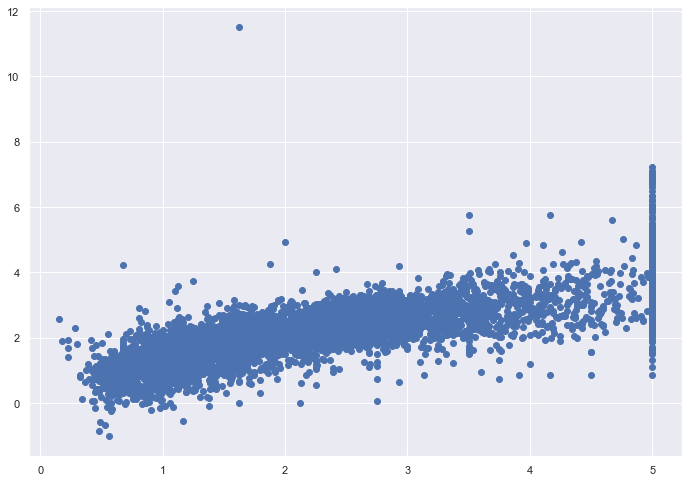

In [57]:

## plot a scatter plot for the prediction
plt.scatter(y_test,regr_pred);

In [59]:
## Residuals
residuals = y_test-regr_pred
residuals

20046   -0.249049
3024    -1.309434
15663    2.289088
20484   -0.649147
9814     0.173042
           ...   
17505    0.155059
13512   -0.237516
10842    0.109345
16559   -0.379714
5786     0.270559
Name: Price, Length: 6192, dtype: float64

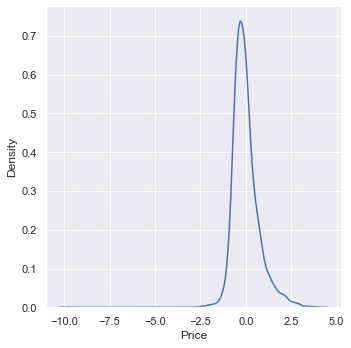

In [60]:
## Plot this residuals 

sns.displot(residuals,kind="kde")

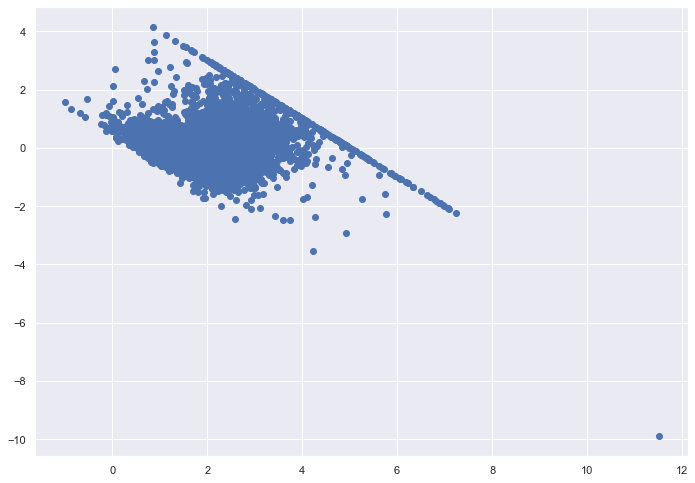

In [62]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(reg_pred,residuals);

In [63]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test, regr_pred))
print(mean_squared_error(y_test, regr_pred))
print(np.sqrt(mean_squared_error(y_test, regr_pred)))

0.5272474538305952
0.5305677824766755
0.7284008391515454


As we are dealing with a regression problem. Therefore, attention is largely on the RMSE as the most common metric for evaluating the Model performance. Calculating the RMSE tells us the average distance between the predicted values from model and the actual values in the dataset. Basically, is the  and going by the rule of thumb, RMSE yield 0.73 approximately seems not a bad prediction from our model.

In [64]:
from sklearn.metrics import r2_score
score=r2_score(y_test,regr_pred)
print(score)

0.5957702326061662


In [70]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5952472117200025

In [68]:
housing.data[0]

array([   8.3252    ,   41.        ,    6.98412698,    1.02380952,
        322.        ,    2.55555556,   37.88      , -122.23      ])

In [71]:
housing.data[0].reshape(1, -1)

array([[   8.3252    ,   41.        ,    6.98412698,    1.02380952,
         322.        ,    2.55555556,   37.88      , -122.23      ]])

In [73]:
##transformation of new data
scaler.transform(housing.data[0].reshape(1,-1))

c:\Users\Acer\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 2.33526315,  0.98504972,  0.63012521, -0.16586931, -0.96995366,
        -0.04555657,  1.04385626, -1.32105914]])

### Model Deployment

In [74]:
import pickle

In [78]:
pickle.dump(regression,open('regmodel.pkl', 'wb'))

In [79]:
pickled_model = pickle.load(open('regmodel.pkl','rb'))

In [80]:
## Prediction
pickled_model.predict(scaler.transform(housing.data[0].reshape(1,-1)))

c:\Users\Acer\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.14333441])